Autoencoder는 대표적인 비지도 학습을 위한 인공신경망 구조 중 하나이다

데이터의 숨겨진 구조를 발견하는 것이 목표인 학습 방법

**출력층의 노드 개수와 입력층의 노드 개수가 동일**

AutoEncoder의 핵심은 재구축된 출력층의 출력값이 아니라, 은닉층의 출력값이다.  
은닉층의 노드 개수가 입력층과 출력층의 노드 개수보다 적다.  
은닉층은 더 작은 표현력으로 원본 데이터의 모든 특징들을 학습해야 한다.  
**결과적으로 은닉층의 출력밧은 원본 데이터에서 불필요한 특징들을 제거한 압축된 특징들을 학습하게 된다.**  

Trainning과정에서 불필요한 특징들을 자동적으로 제거하고 필요한 특징들만 남아있다.

## Autoencoder를 이용한 MNIST 데이터 재구축

필요한 라이브러리를 임포트

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

학습에 사용할 MNIST 데이터를 다운받고 불러온다.

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


학습에 필요한 Parameter정의
- training_epochs: 반복 횟수
- batch_size = 배치 개수
- display_step: 손실 함수 출력 주기
- examples_to_show: 보여죽 MNIST Reconstruction 이미지 개수

In [3]:
learning_rate = 0.02
training_epochs = 50
batch_size = 256
display_step = 5
examples_to_show = 10
input_size = 784
hidden1_size = 256
hidden2_size = 128

입력값을 받기 위한 플레이스 홀더 정의  
비지도 학습이므로 타겟 레이블 y는 필요 없다.

In [4]:
x = tf.placeholder(tf.float32, shape = [None, input_size])

Auto Encoder Model 생성  
**input      -> Encoder                      -> Decoder      -> output**  
**input: 784 -> hidden1: 256 -> hidden2: 128 -> hidden3: 256 -> output: 784**

In [5]:
def build_autoencoder(x):
    #Encoding: 784 -> 256 -> 128
    W1 = tf.Variable(tf.random_normal(shape = [input_size, hidden1_size]))
    b1 = tf.Variable(tf.random_normal(shape =[hidden1_size]))
    H1_output = tf.nn.sigmoid(tf.matmul(x,W1)+b1)
    
    W2 = tf.Variable(tf.random_normal(shape = [hidden1_size,hidden2_size]))
    b2 = tf.Variable(tf.random_normal(shape =[hidden2_size]))
    H2_output = tf.nn.sigmoid(tf.matmul(H1_output,W2)+b2)
    
    #Decoding: 128 -> 256 -> 784
    W3 = tf.Variable(tf.random_normal(shape = [hidden2_size, hidden1_size]))
    b3 = tf.Variable(tf.random_normal(shape =[hidden1_size]))
    H3_output = tf.nn.sigmoid(tf.matmul(H2_output,W3)+b3)
    
    W4 = tf.Variable(tf.random_normal(shape = [hidden1_size,input_size]))
    b4 = tf.Variable(tf.random_normal(shape =[input_size]))
    reconstructed_x = tf.nn.sigmoid(tf.matmul(H3_output,W4)+b4)
    
    return reconstructed_x

AutoEncoder 그래프 구조를 생성하고    
target Data선언(input Data와 같다.)  

In [6]:
y_pred = build_autoencoder(x)
y_true = x

Instructions for updating:
Colocations handled automatically by placer.


- LossFunction: MSE
- Optimizer: RMSProp

In [7]:
loss = tf.reduce_mean(tf.pow(y_true - y_pred,2))
train_step = tf.train.RMSPropOptimizer(learning_rate).minimize(loss)

Session을 열고 그래프 실행

반복(Epoch): 0, 손실함수(Loss): 0.181670
반복(Epoch): 5, 손실함수(Loss): 0.093784
반복(Epoch): 10, 손실함수(Loss): 0.076891
반복(Epoch): 15, 손실함수(Loss): 0.067799
반복(Epoch): 20, 손실함수(Loss): 0.062954
반복(Epoch): 25, 손실함수(Loss): 0.057217
반복(Epoch): 30, 손실함수(Loss): 0.049529
반복(Epoch): 35, 손실함수(Loss): 0.047211
반복(Epoch): 40, 손실함수(Loss): 0.045349
반복(Epoch): 45, 손실함수(Loss): 0.044621
Trainning Finish


C:\Tensor\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


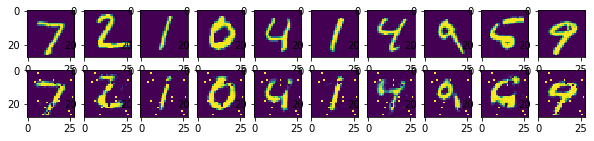

In [8]:
with tf.Session() as sess:
    #변수 초기화
    sess.run(tf.global_variables_initializer())
    
    #지정한 횟수만큼 최적화 수행
    for epoch in range(training_epochs):
        total_batch = int(mnist.train.num_examples/batch_size)
        
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            _,current_loss = sess.run([train_step, loss],feed_dict={x:batch_xs})
            
            #지정한 epoch마다 학습결과 출력
        if epoch % display_step == 0:
            print('반복(Epoch): %d, 손실함수(Loss): %f' % (epoch, current_loss))
    print('Trainning Finish')
    
    # 테스트 데이터로 Reconstruction을 수행합니다.
    reconstructed_result = sess.run(y_pred, feed_dict={x: mnist.test.images[:examples_to_show]})
    # 원본 MNIST 데이터와 Reconstruction 결과를 비교합니다.
    f, a = plt.subplots(2, 10, figsize=(10, 2))
    for i in range(examples_to_show):
        a[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
        a[1][i].imshow(np.reshape(reconstructed_result[i], (28, 28)))
    f.savefig('reconstructed_mnist_image.png')  # reconstruction 결과를 png로 저장합니다.
    f.show()

AutoEncoder가 원본 데이터를 재현해내지 못했기 떄문에 재구축된 MNIST이미지에 약간의 노이즈가 포함되어 있다.

In [ ]:
## Autoencoder + Softmax Classifier를 이용한 MNIST 데이터 재구축

파인 튜닝 = 전이학습  
파라미터를 처음부터 조절하는 것이 아닌 학습된 파라미터를 가져와서 그로부터 다시 다른 특징을 잘 분류하도록 튜닝하는 학습방법이다.  

위의 결과에서 Decoder를 거치는 것이 아니라 Encoder의 특징을 Softmax로서 Classifier를 하여 좀 더 분류를 잘 할수 있게 설계하는 것이 목표이다.  

Softmax분류를 처음부터 Parameter를 Trainning하는 것이 아니라 어느 정도 학습된 AutoEncoder의 출력값으로서 사용하는 것을 목표로 한다.  

**AutoEncoder의 출력 => (AutoEncoder의 Parameter를 활용한)SoftMax를 활용한 Classify**

위에서 정의한 라이브러리와 데이터 그대로 사용  
학습에 필요한 파라미터 선언

In [9]:
learning_rate_RMSProp = 0.02
learning_rate_GradientDescent = 0.5
num_epochs = 100
batch_size = 256
display_step = 5
input_size = 784
hidden1_size = 128
hidden2_size = 64

인풋 데이터와 타겟 데이터를 받을 플레이스홀더를 정의

In [10]:
x = tf.placeholder(tf.float32, shape=[None, input_size])
y = tf.placeholder(tf.float32, shape = [None, 10])

Model 선언
- AutoEncoder: 784 -> 128 -> 64(압축된 특징)
- SoftmaxClassifier: 64(압축된 특징) -> 10(MNIST 숫자 개수)

In [11]:
#AutoEncoder 선언
def build_autoencoder(x):
    #Encoding: 784 -> 128 -> 64
    Wh_1 = tf.Variable(tf.random_normal(shape = [input_size, hidden1_size]))
    bh_1 = tf.Variable(tf.random_normal(shape =[hidden1_size]))
    H1_output = tf.nn.sigmoid(tf.matmul(x,Wh_1)+bh_1)
    
    Wh_2 = tf.Variable(tf.random_normal(shape = [hidden1_size,hidden2_size]))
    bh_2 = tf.Variable(tf.random_normal(shape =[hidden2_size]))
    H2_output = tf.nn.sigmoid(tf.matmul(H1_output,Wh_2)+bh_2)
    
    #Decoding: 64 -> 128 -> 784
    Wh_3 = tf.Variable(tf.random_normal(shape = [hidden2_size, hidden1_size]))
    bh_3 = tf.Variable(tf.random_normal(shape =[hidden1_size]))
    H3_output = tf.nn.sigmoid(tf.matmul(H2_output,Wh_3)+bh_3)
    
    Wo = tf.Variable(tf.random_normal(shape = [hidden1_size,input_size]))
    bo = tf.Variable(tf.random_normal(shape =[input_size]))
    X_reconstructed = tf.nn.sigmoid(tf.matmul(H3_output,Wo)+bo)
    
    return X_reconstructed, H2_output
    
#Softmax Classifier 선언
def build_softmax_classifier(x):
    W_softmax = tf.Variable(tf.zeros([hidden2_size,10]))
    b_softmax = tf.Variable(tf.zeros([10]))
    y_pred = tf.nn.softmax(tf.matmul(x, W_softmax)+b_softmax)
    
    return y_pred

AutoEncoder + Softmax Classifier 를 통하여 실제 Model 생성

In [12]:
#AutoEncoder를 통한 결과 출력
y_pred, extracted_features = build_autoencoder(x)
y_true = x
#AutoEncoder의 출력을 활용한 Softmax Classifier
y_pred_softmax = build_softmax_classifier(extracted_features)

- Loss Function: MSE, CrossEntropy
- Optimizer: RMSProp, GradientDescent

In [13]:
# Pre-Training: MNIST 데이터 재구축을 목적으로 하는 손실함수와 옵티마이저를 정의
pretraining_loss = tf.reduce_mean(tf.pow(y_true - y_pred,2))
pretraining_train_step = tf.train.RMSPropOptimizer(learning_rate_RMSProp).minimize(pretraining_loss)

#Fine-Tuning: MNIST 데이터 분류를 목적으로 하는 손실 함수와 옵티마이저를 정의
finetuning_loss = tf.reduce_mean(-tf.reduce_sum(y*tf.log(y_pred_softmax), reduction_indices=[1]))
finetuning_train_step = tf.train.GradientDescentOptimizer(learning_rate_GradientDescent).minimize(finetuning_loss)

Instructions for updating:
Use tf.cast instead.


세션을 열어서 그래프를 실행하고 학습된 모델의 정확도를 출력

In [15]:
with tf.Session() as sess:
    #변수들의 초기값을 할당
    sess.run(tf.global_variables_initializer())
    
    #전체 배치 개수를 불러오기
    total_batch = int(mnist.train.num_examples/batch_size)
    
    #Step1: MNIST 데이터 재구축을 위한 오토인코더 최적화(Pre-Trainning)
    for epoch in range(num_epochs):
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            _,pretraining_loss_print = sess.run([pretraining_train_step,pretraining_loss],feed_dict={x:batch_xs})
        if epoch % display_step ==0:
            print('반복(Epoch): %d, Pre-Trainning 손실 함수(pretraining_loss): %f'%(epoch, pretraining_loss_print))
    print('Step1: MNIST 데이터 재구축을 위한 오토인코더 최적화 완료(Pre-Training)')
    
    
    #Step2: MNIST 데이터 분류를 위한 오토인코더 + Softmax 분류기 최적화(Fine-tunning)
    for epoch in range(num_epochs+100):
        #모든 배치들에 대해서 최적화를 수행
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            _,finetuning_loss_print = sess.run([finetuning_train_step,finetuning_loss],feed_dict={x:batch_xs, y:batch_ys})
            
            #지정된 epoch마다 학습결과를 출력
        if epoch % display_step == 0:
            print('반복(Epoch): %d, Fine-Tuning 손실 함수(Fine-Tuning_loss): %f'%(epoch, finetuning_loss_print))
    print('Step2: MNIST 데이터 분류를 위한 오토인코더 + Softmax 분류기 최적화 완료')

    #최종 Model에 대한 성능 평가
    correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_pred_softmax,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print('정확도(오토인코더 + Softmax 분류기): %f'%sess.run(accuracy,feed_dict={x:mnist.test.images, y:mnist.test.labels}))        

반복(Epoch): 0, Pre-Trainning 손실 함수(pretraining_loss): 0.188704
반복(Epoch): 5, Pre-Trainning 손실 함수(pretraining_loss): 0.072182
반복(Epoch): 10, Pre-Trainning 손실 함수(pretraining_loss): 0.048455
반복(Epoch): 15, Pre-Trainning 손실 함수(pretraining_loss): 0.041352
반복(Epoch): 20, Pre-Trainning 손실 함수(pretraining_loss): 0.039895
반복(Epoch): 25, Pre-Trainning 손실 함수(pretraining_loss): 0.034519
반복(Epoch): 30, Pre-Trainning 손실 함수(pretraining_loss): 0.034086
반복(Epoch): 35, Pre-Trainning 손실 함수(pretraining_loss): 0.028195
반복(Epoch): 40, Pre-Trainning 손실 함수(pretraining_loss): 0.026524
반복(Epoch): 45, Pre-Trainning 손실 함수(pretraining_loss): 0.027346
반복(Epoch): 50, Pre-Trainning 손실 함수(pretraining_loss): 0.027134
반복(Epoch): 55, Pre-Trainning 손실 함수(pretraining_loss): 0.024106
반복(Epoch): 60, Pre-Trainning 손실 함수(pretraining_loss): 0.023491
반복(Epoch): 65, Pre-Trainning 손실 함수(pretraining_loss): 0.022648
반복(Epoch): 70, Pre-Trainning 손실 함수(pretraining_loss): 0.020428
반복(Epoch): 75, Pre-Trainning 손실 함수(pretraining_loss): 0.0